In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G_FB = nx.read_edgelist("data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [3]:
print((G_FB))

Graph with 4039 nodes and 88234 edges


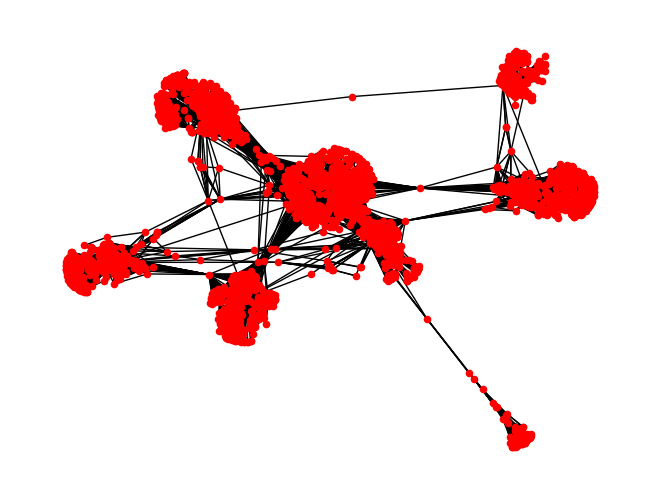

In [4]:
plt.Figure(figsize=(12,10))

spring_pos = nx.spring_layout(G_FB, seed=40)

nx.draw(G_FB, pos=spring_pos, node_size=20, node_color='red')

É possível identificar diferentes comunidades de acordo com as conexões

Também é possível notar uma clusterização (agrupamento) de pessoas em relação aos amigos e elas conseguem se conectar com outras comunidades a partir de pessoas específicas (pessoas entre as comunidades)

In [5]:
# Importar algoritmo de deteccção de comunidades
from community import community_louvain

In [6]:
# computar os grupos
partitions = community_louvain.best_partition(G_FB)

# Transformar os valores em listas
values = list(partitions.values())

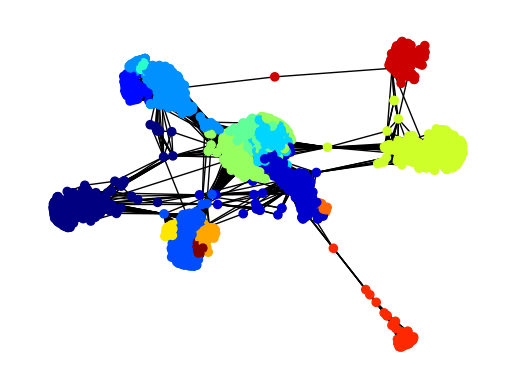

In [7]:
plt.Figure(figsize=(12,10))
plt.axis('off')

# Mostrar as comunidades identificadas separadas por cores diferentes
nx.draw_networkx(G_FB, pos=spring_pos, node_size=35, cmap=plt.get_cmap('jet'),
                    node_color=values,  with_labels=False)

## **Separar uma comunidade**

Primeiro, verificamos quantas comunidades foram detectadas pelo algoritmo

In [8]:
list(set(values))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [9]:
# Separar uma comunidade [cluster]
# Testando com o cluster 0
cluster_id = 0

cluster = [node for node in partitions if partitions[node] == cluster_id]


In [10]:
# Criar um subgrafo com os nós selecionados
cluster = G_FB.subgraph(cluster)

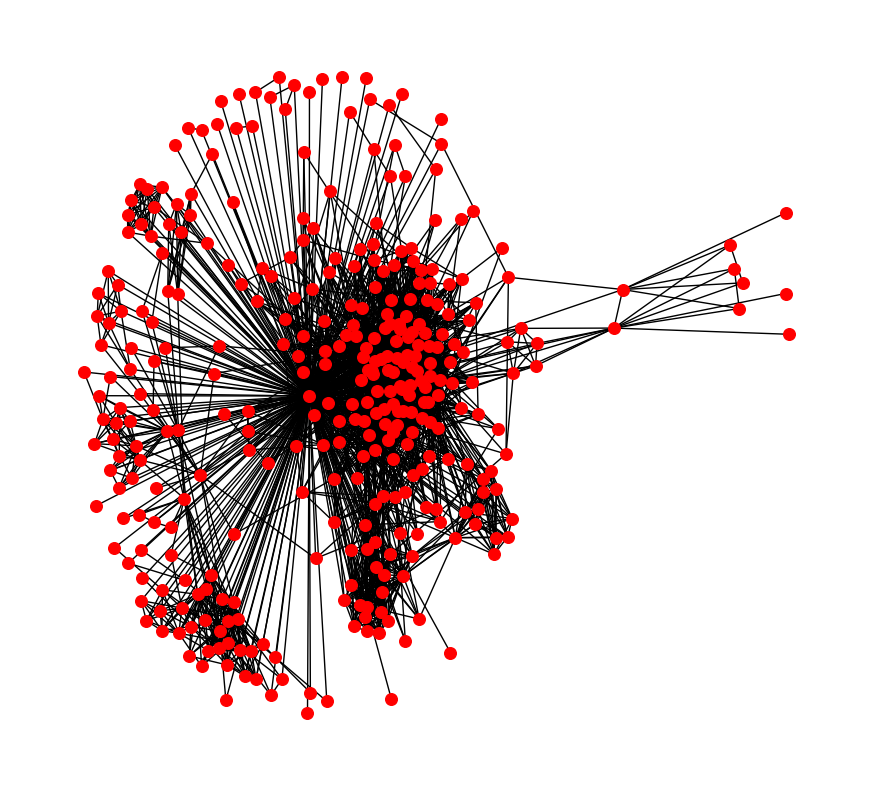

In [11]:
plt.figure(figsize=(11, 10))
plt.axis('off')

nx.draw_networkx(cluster, node_color = "red",
                 node_size = 70, with_labels = False)

Com um conjunto de features, podemos identificar quais as características que predominam em cada grupo e definir diferentes perfis. Com essas informações nós podemos seguir diferentes conteúdos e produtos para cada perfil.

Caso uma pessoa entre na rede, podemos identificar suas características únicas e coloca-lá em um grupo preexistente